In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('/Users/raghavvamshithamshetty/Desktop/ML/Project/apartments_for_rent_classified_100K.csv', delimiter=';', encoding='latin1')
df.tail()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670
99491,5121218844,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,...,"$1,595",Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185659


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   44138 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [6]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     55354
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [3]:
#https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP
gdp_data = {
    "state": [
        "DC", "NY", "MA", "WA", "CA", "CT", "DE", "NJ", "AK", "IL",
        "MD", "MN", "CO", "VA", "RI", "OR", "ND", "NE", "KS", "LA",
        "HI", "TX", "PA", "FL", "GA", "NC", "MI", "OH", "WI", "IN",
        "MO", "TN", "NV", "AZ", "KY", "OK", "AL", "SC", "NM", "ID",
        "MT", "WV", "AR", "MS", "VT", "WY", "SD", "ME", "NH", "IA", "UT"
    ],
    "GDP Per Capita": [
        263220, 117332, 110561, 108468, 104916, 103744, 97632, 96728, 95732, 91732,
        90732, 89732, 88732, 87732, 86732, 85732, 84732, 83732, 82732, 81732,
        80732, 79732, 78732, 77732, 76732, 75732, 74732, 73732, 72732, 71732,
        70732, 69732, 68732, 67732, 66732, 65732, 64732, 63732, 62732, 61732,
        60732, 60783, 60276, 53061, 52732, 51732, 50732, 49732, 48732, 47732, 46732
    ]
}
gdp_df = pd.DataFrame(gdp_data)

In [4]:
violent_crime_rate_per_1000 = {
    "state": [
        "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", "HI", "ID", "IL",
        "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT",
        "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA",
        "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
    ],
    "violent_crime_rate_per_1000": [
        5.196, 8.380, 4.848, 5.436, 4.421, 4.231, 1.816, 4.643, 11.509, 3.849, 3.266,
        2.501, 2.240, 4.041, 3.714, 2.662, 3.800, 2.320, 5.493, 1.086, 4.541, 3.096,
        4.374, 2.364, 2.912, 4.950, 3.650, 3.000, 6.781, 1.464, 1.954, 7.782, 3.638,
        3.776, 2.800, 2.930, 4.661, 2.850, 3.890, 2.310, 5.300, 3.360, 6.730, 4.100,
        2.390, 1.150, 2.080, 3.110, 3.160, 2.930, 2.080
    ]
}
violent_crime_rate_df = pd.DataFrame(violent_crime_rate_per_1000)

In [5]:
#https://nces.ed.gov/programs/coe/indicator/cmb/public-school-expenditure , in thousands per pupil
per_pupil_expenditure_df = {
    "state": [
        "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
        "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
        "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
        "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
        "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",
        "DC"
    ],
    "school_expenditure_in_1000s": [
        13.5, 24.2, 13.2, 15.5, 19.3, 17.6, 27.3, 20.6, 14.0, 15.5,
        20.0, 11.7, 20.0, 14.6, 17.3, 16.3, 15.6, 15.5, 23.0, 21.4,
        26.0, 17.9, 17.2, 13.4, 15.7, 17.7, 19.0, 13.8, 23.6, 27.8,
        15.5, 32.2, 13.2, 20.2, 18.5, 13.0, 20.4, 22.6, 22.4, 16.5,
        15.1, 13.4, 15.8, 12.3, 28.6, 17.2, 22.0, 16.6, 17.9, 22.7,
        37.8
    ]
}
per_pupil_expenditure_df = pd.DataFrame(per_pupil_expenditure_df)

In [6]:
#https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population
state_population = {
    "state": [
        "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
        "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
        "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
        "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
        "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",
        "DC"
    ],
    "population_in_1000s": [
        4597.7, 648.5, 7227.8, 3088.4, 39431.3, 5961.0, 3503.6, 1003.4, 23372.2, 11180.9,
        1441.6, 1964.7, 12710.2, 6924.3, 3241.5, 2970.6, 4588.4, 4272.4, 1372.2, 6245.5,
        7136.2, 10140.5, 5793.2, 2943.0, 6263.2, 1145.9, 1984.7, 3675.1, 1439.6, 9500.9,
        2113.3, 19867.2, 11046.0, 779.3, 11883.3, 4095.4, 4597.7, 13078.8, 1096.0, 5157.7,
        902.5, 7582.4, 31290.8, 3267.5, 648.5, 8811.2, 7958.2, 1740.0, 5961.0, 587.6,
        702.3
    ]
}
state_population_df = pd.DataFrame(state_population)

In [7]:
region_data = {
    "state": [
        "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"
    ],
    "region": [
        "Southeast", "West", "West", "Southeast", "West", "West", "Northeast", "Northeast", "Southeast", "Southeast", "West", "West", "Midwest", "Midwest", "Midwest", "Midwest", "Southeast", "Southeast", "Northeast", "Northeast", "Northeast", "Midwest", "Midwest", "Southeast", "Midwest", "West", "Midwest", "West", "Northeast", "Northeast", "West", "Northeast", "Southeast", "Midwest", "Midwest", "South", "West", "Northeast", "Northeast", "Southeast", "Midwest", "Southeast", "South", "West", "Northeast", "Southeast", "West", "Southeast", "Midwest", "West", "Northeast"
    ]
}

region_df = pd.DataFrame(region_data)

In [8]:
merged_df = pd.merge(df, gdp_df, how='left', on='state')
merged_df = pd.merge(merged_df, region_df, how='left', on='state')
merged_df = pd.merge(merged_df, violent_crime_rate_df, how='left', on='state')
merged_df = pd.merge(merged_df, per_pupil_expenditure_df, how='left', on='state')
merged_df = pd.merge(merged_df, state_population_df, how='left', on='state')
merged_df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,state,latitude,longitude,source,time,GDP Per Capita,region,violent_crime_rate_per_1000,school_expenditure_in_1000s,population_in_1000s
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,CA,33.8520,-118.3759,RentLingo,1577360355,104916.0,West,4.421,19.3,39431.3
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,VA,37.0867,-76.4941,RentLingo,1577360340,87732.0,Southeast,2.080,17.2,8811.2
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,NC,35.8230,-78.6438,RentLingo,1577360332,75732.0,Southeast,3.776,13.2,11046.0
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,CA,38.3622,-121.9712,RentLingo,1577360330,104916.0,West,4.421,19.3,39431.3
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,NM,35.1038,-106.6110,RentLingo,1577360308,62732.0,West,7.782,15.5,2113.3


In [13]:
df.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [9]:
merged_df.drop(columns=['category','title','body','amenities','currency','fee','has_photo','price_display','price_type','address','source','time','pets_allowed'], inplace=True)

In [15]:
bathroom_min = merged_df['bathrooms'].min()
bathroom_max = merged_df['bathrooms'].max()
print(f"Bathroom min: {bathroom_min}, Bathroom max: {bathroom_max}")
print(merged_df['bathrooms'].mean())

Bathroom min: 1.0, Bathroom max: 9.0
1.4453227931488801


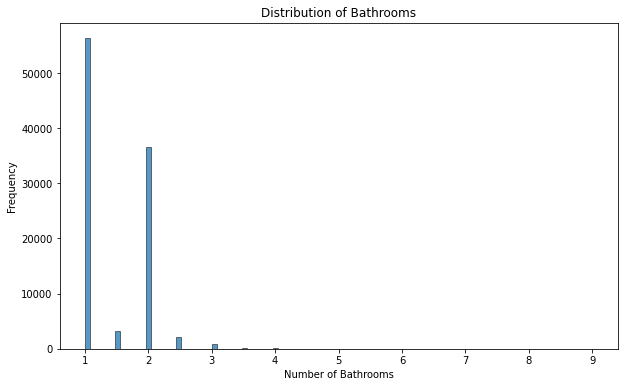

In [16]:
#plot bathrooms histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['bathrooms'], bins=100)
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()


In [17]:
bedroom_min = merged_df['bedrooms'].min()
bedroom_max = merged_df['bedrooms'].max()
print(f"Bedroom min: {bedroom_min}, Bedroom max: {bedroom_max}")
print(merged_df['bedrooms'].mean())

Bedroom min: 0.0, Bedroom max: 9.0
1.7282123017470412


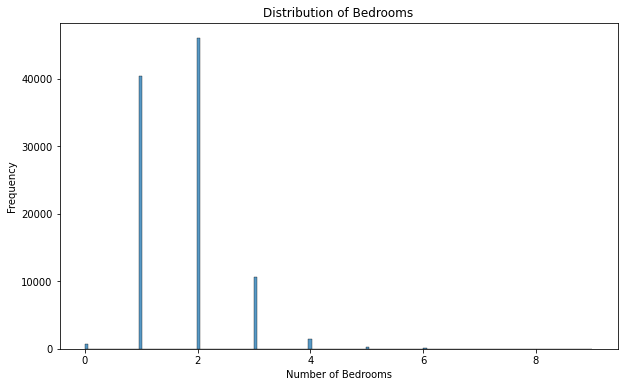

In [18]:
#histogram for bedrooms
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['bedrooms'], bins=150)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [10]:
bathroom_mean = merged_df['bathrooms'].mean()
bedroom_mean = merged_df['bedrooms'].mean() 
merged_df['bathrooms'].fillna(bathroom_mean, inplace=True)
merged_df['bedrooms'].fillna(bedroom_mean, inplace=True)

In [20]:
merged_df.isnull().sum()

id                               0
bathrooms                        0
bedrooms                         0
price                            1
square_feet                      0
cityname                       302
state                          302
latitude                        25
longitude                       25
GDP Per Capita                 302
region                         302
violent_crime_rate_per_1000    302
school_expenditure_in_1000s    302
population_in_1000s            302
dtype: int64

In [11]:
merged_df.dropna(inplace=True)

In [12]:
merged_df.shape

(99189, 14)

In [13]:
merged_df = merged_df[(merged_df['price'] >= -1184) & (merged_df['price'] <= 4234)]

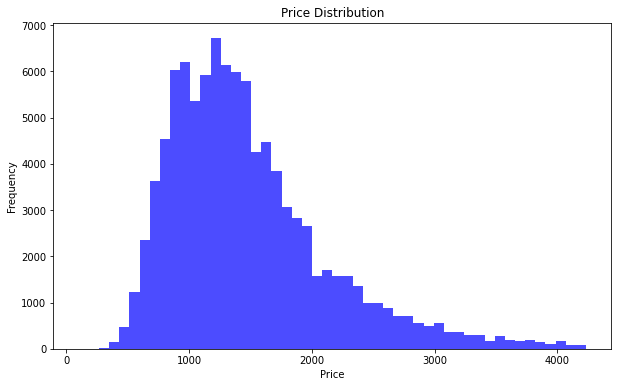

In [24]:
#price distribution histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['price'], bins=50, color='blue', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [25]:
merged_df.shape

(98189, 14)

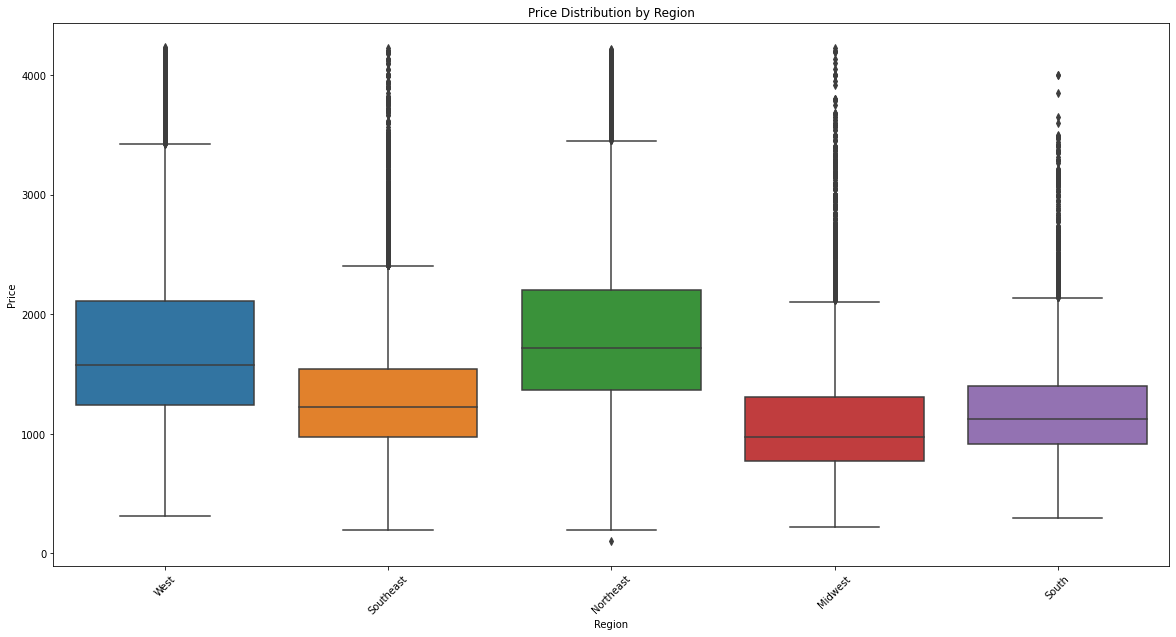

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='region', y='price', data=merged_df)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(20, 10))

In [14]:
label_encoder = LabelEncoder()
merged_df['Region_Encoded'] = label_encoder.fit_transform(merged_df['region'])
merged_df['State_Encoded'] = label_encoder.fit_transform(merged_df['state'])

<AxesSubplot:>

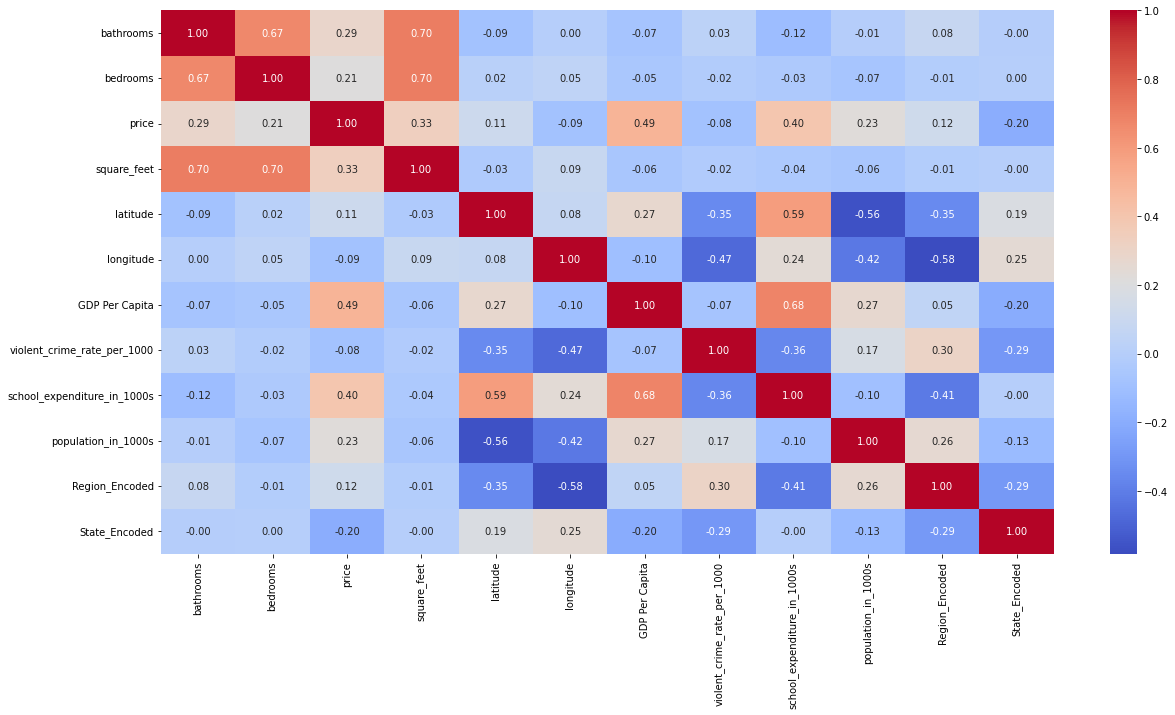

In [15]:
encoded_data = merged_df.drop(['state','id','region'], axis=1)
corr = encoded_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [16]:
encoded_data.drop(columns=['State_Encoded','Region_Encoded','cityname'], inplace=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(encoded_data)

# Print VIF for each variable
print("VIF Values for each variable:")
for i in range(X.shape[1]):
    var = X.columns[i]
    vif_value = variance_inflation_factor(X.values, i)
    print(f"{var}: {vif_value:.2f}")

VIF Values for each variable:
const: 189.29
bathrooms: 2.38
bedrooms: 2.29
price: 1.76
square_feet: 2.66
latitude: 3.94
longitude: 2.40
GDP Per Capita: 2.73
violent_crime_rate_per_1000: 1.70
school_expenditure_in_1000s: 3.94
population_in_1000s: 3.15


Linear Regression


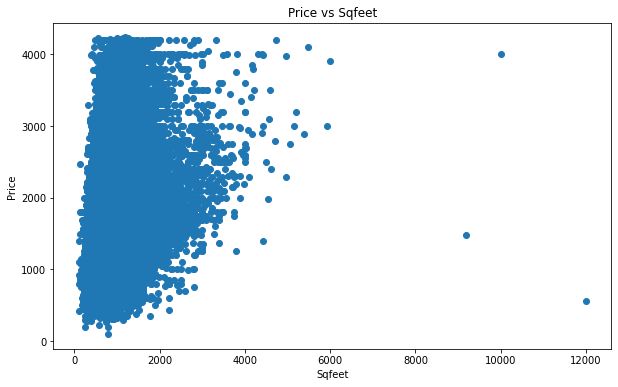

In [31]:
#price distribution vs sqfeet
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['square_feet'], merged_df['price'])
plt.title('Price vs Sqfeet')
plt.xlabel('Sqfeet')
plt.ylabel('Price')
plt.show()

In [18]:
X = encoded_data.drop(columns=['price'])
y = encoded_data['price']  

scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))
print(model.score(X_test, y_test))
print(model.coef_)
print(model.intercept_)


230227.90365289387
0.4459118199847816
[119.45136444 -59.92904273 201.15851585 -36.94737918 -83.9680468
 189.45311274 -39.63829761 182.29209872  71.71607755]
1475.4282811698602


Polynomial Regression

In [19]:
r_squares = []

order = [1,2,3,4,5]
lr = LinearRegression()

for n in order:
    pr = PolynomialFeatures(degree= n)
    xpolytrain_pr = pr.fit_transform(X_train)
    xpolytest_pr = pr.fit_transform(X_test)
    lr.fit(xpolytrain_pr, y_train)
    r_squares.append(lr.score(xpolytest_pr, y_test))
    print(lr.intercept_)
print(r_squares)

for i in range(len(r_squares)):
    print(f"Degree {i+1}: R^2 = {r_squares[i]}")


1475.4282811698602
1500.8117660546156
395.27051652261866
600659394.005406
1289848.3096122022
[0.44591181998478135, 0.5360988105941928, 0.6561712864928257, 0.6591637137520181, -167.72500199752432]
Degree 1: R^2 = 0.44591181998478135
Degree 2: R^2 = 0.5360988105941928
Degree 3: R^2 = 0.6561712864928257
Degree 4: R^2 = 0.6591637137520181
Degree 5: R^2 = -167.72500199752432


Decision Tree Regressor

In [144]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))
print(model.score(X_test, y_test))
print(model.feature_importances_)


feature_names = encoded_data.drop(columns=['price']).columns
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

103897.20892651215
0.7499511810282323
[0.02695863 0.01015473 0.21411202 0.17711666 0.13359348 0.40469755
 0.01027494 0.00290689 0.0201851 ]


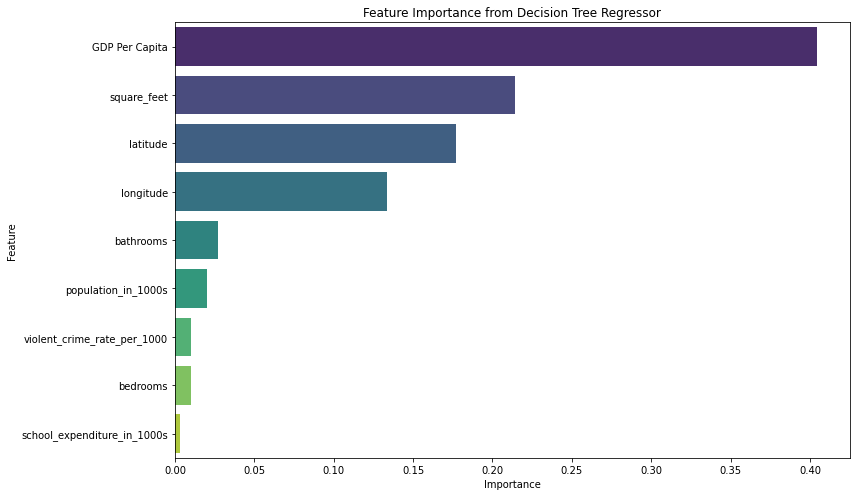

In [145]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Decision Tree Regressor')
plt.tight_layout()
plt.show()

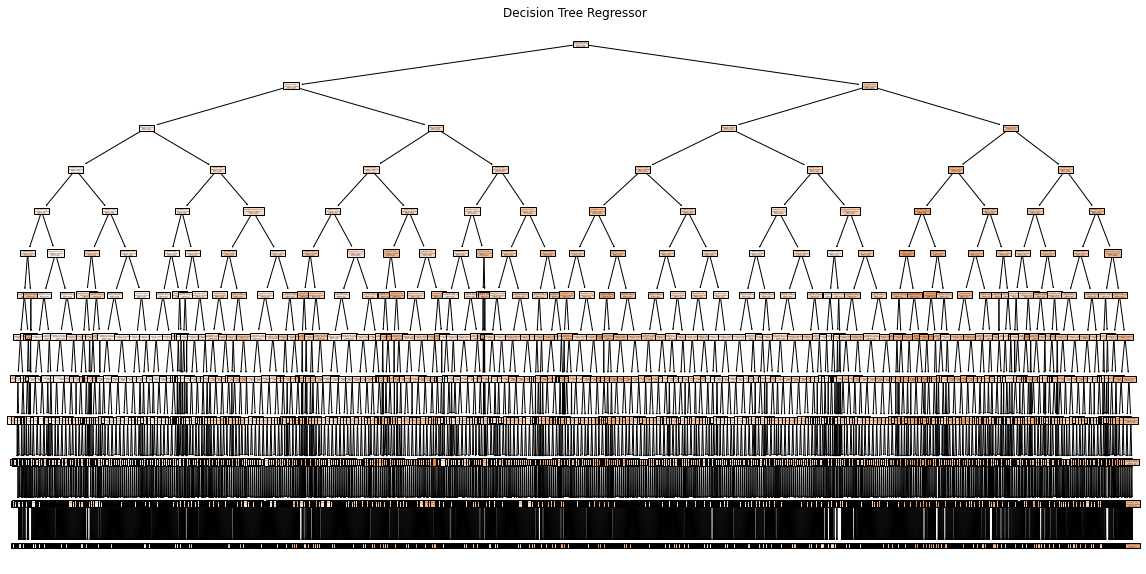

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=encoded_data.drop(columns=['price']).columns)
plt.title('Decision Tree Regressor')
plt.show()


Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))
print(model.score(X_test, y_test))

59588.20366420393
0.8565894107759691


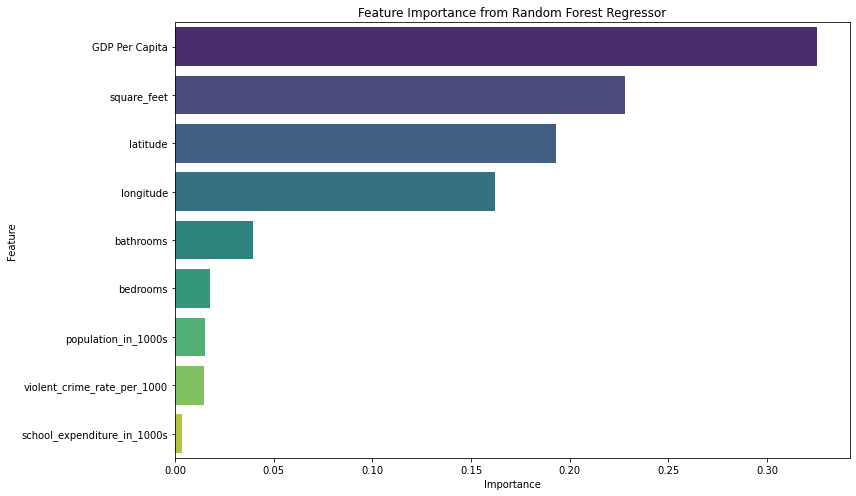

In [147]:
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Regressor')
plt.tight_layout()
plt.show()

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
mse_values = []
n_estimators = range(1, 100)
for n in n_estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(n_estimators, mse_values)
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Test for Random Forest Regressor')
plt.show()

KeyboardInterrupt: 

Text(0, 0.5, 'Predicted Values')

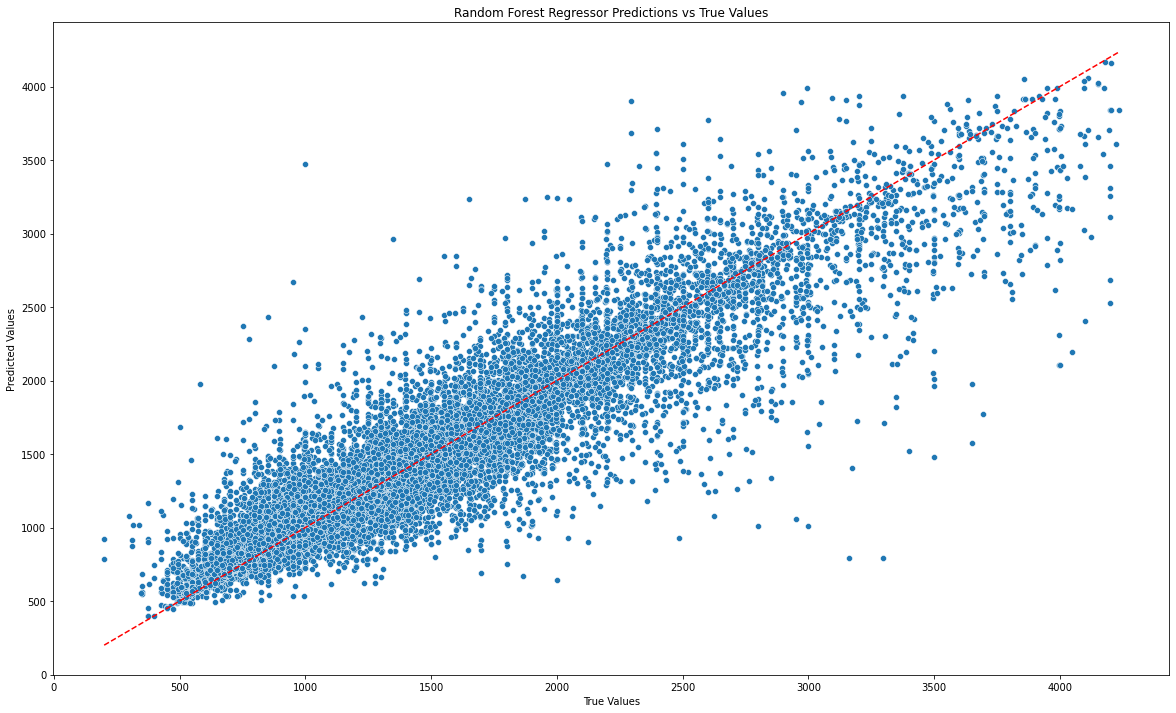

In [149]:
#visualise sactter plot of random forest regressor using seaborn

plt.figure(figsize=(20, 12))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Random Forest Regressor Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

Support Vector Regressor

In [ ]:
#SVR
from sklearn.svm import SVR
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))
print(svr.score(X_test, y_test))


In [ ]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('SVR Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')